# Dataset Stats
This notebook is supposed to give some insight into corpus and tries to answer some questions like:
- How documents are there?
- In what language are they written
- What is the avarage length of the writings
- etc

In [1]:
dataDir = 'data/json'

In [2]:
# Number of files
import os, os.path
import json

stats = {
    'numDocs': 0,
    'lang': {},
    'hasPlaintext': 0,
    'docLen': [],
    'citationCounts': {
        'cites': [],
        'citedBy': []
    },
    'hasRepecHdl': 0
}

## Gather information

In [3]:
files = [name for name in os.listdir(dataDir) \
         if os.path.isfile(os.path.join(dataDir, name))]

stats['numDocs'] = len(files)
test = 0
isEnglish = set()
hasCitation = set()
hasPlaintext = set()

for doc in files:
    with open(os.path.join(dataDir, doc)) as fh:
        try:
            jsonDoc = json.load(fh)
        except UnicodeDecodeError:
            continue
    # lang
    if 'lang' in jsonDoc:
        if jsonDoc['lang'] in stats['lang']:
            stats['lang'][jsonDoc['lang']] += 1
            if jsonDoc['lang'] == 'en':
                isEnglish.add(doc)
        else:
            stats['lang'][jsonDoc['lang']] = 1
    
    # has plaintext
    if 'plaintext' in jsonDoc and len(jsonDoc['plaintext']) > 0:
        stats['hasPlaintext'] += 1
        # average # of words
        stats['docLen'].append(len(jsonDoc['plaintext'].split()))
        hasPlaintext.add(doc)
        
    # citation count
    if 'citedBy' in jsonDoc and 'cites' in jsonDoc:
        if jsonDoc['citedBy'] is not None or jsonDoc['cites'] is not None:
            if isinstance(jsonDoc['cites'], str):
                stats['citationCounts']['cites'].append(int(jsonDoc['cites']))
                hasCitation.add(doc)
            else:
                stats['citationCounts']['cites'].append(0)
            
            if isinstance(jsonDoc['citedBy'], str):
                stats['citationCounts']['citedBy'].append(int(jsonDoc['citedBy']))
                hasCitation.add(doc)
            else:
                stats['citationCounts']['citedBy'].append(0)

## Calculation and visualization
### Document lengths

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


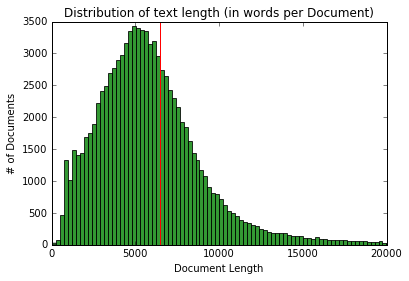

In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

docLen = np.array(stats['docLen'])
docLenMean = docLen.mean()

fig = plt.figure()
ax = fig.add_subplot(111)

numBins = 1000
ax.hist(docLen, numBins ,color='green' ,alpha=0.8)
plt.axvline(docLenMean, color='r')
plt.xlim(1, 20000)
plt.xlabel('Document Length')
plt.ylabel('# of Documents')
plt.title('Distribution of text length [words/Document]')
plt.show()


### Citation count distribution

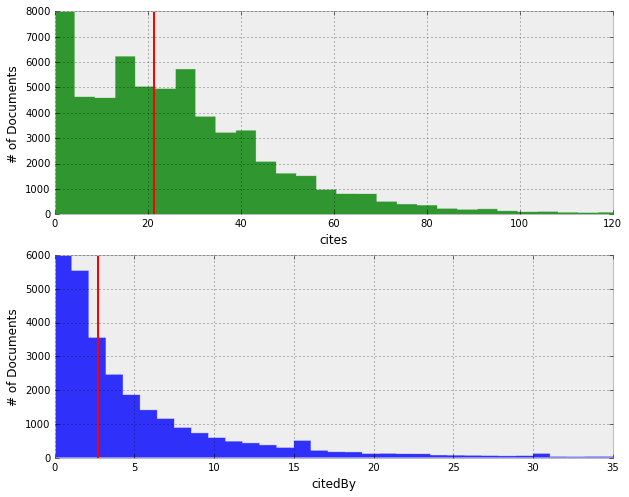

In [11]:
cites = np.array(stats['citationCounts']['cites'])
citesMean = cites.mean()
citedBy = np.array(stats['citationCounts']['citedBy'])
citedByMean = citedBy.mean()

plt.style.use('bmh')
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,8))

numBins = 100
ax0.hist(cites, numBins, color='green', alpha=0.8, histtype="stepfilled")
ax0.set_xlabel('cites')
ax0.set_ylabel('# of Documents')
ax0.set_xlim(0, 120)
ax0.set_ylim(0, 8000)
ax0.axvline(citesMean, color='r')

numBins = 700
ax1.hist(citedBy, numBins, color='blue', alpha=0.8, histtype="stepfilled")
ax1.set_xlabel('citedBy')
ax1.set_ylabel('# of Documents')
ax1.set_xlim(0, 35)
ax1.set_ylim(0, 6000)
ax1.axvline(citedByMean, color='r')
plt.show()

### language distribution

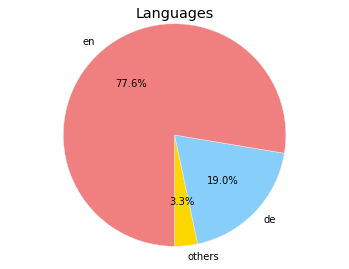

In [9]:
def sumResiduals(data, threshold=200):
    sortedData = sorted(stats['lang'].items(), key=lambda x: -x[1])
    residualsSum = 0
    shortendList = {}
    for l, count in sortedData:
        if count > threshold:
            shortendList[l] = count
        else:
            residualsSum += count
    
    shortendList['others'] = residualsSum
    return shortendList
    

data = sumResiduals(stats['lang'], 1000)
labels = list(data.keys())
sizes = [data[l] for l in labels]
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=-90)
plt.title('Languages')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

### useful documents
##### criteria
- english
- has citation information
- has plaintext

isEnglish ∩ hasCitation ∩ hasPlaintext: 56936


/home/user/anaconda/install/envs/ipynb3/lib/python3.5/site-packages/matplotlib_venn/_venn3.py:116: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


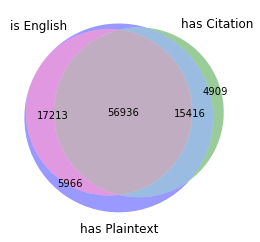

In [7]:
from matplotlib_venn import venn3

print("isEnglish ∩ hasCitation ∩ hasPlaintext: " + \
      str(len(isEnglish.intersection(hasCitation).intersection(hasPlaintext))))
      
venn3([isEnglish, hasCitation, hasPlaintext],
      set_labels=('is English','has Citation','has Plaintext'))